In [712]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score,pairwise_distances_argmin_min
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans


In [713]:
iris = pd.read_csv('K-means_data/iris.csv')
mall_customers = pd.read_csv('K-means_data/Mall_customers.csv')

In [714]:
print(iris.head())
print(iris.shape)
print(iris.describe())
print(iris.value_counts())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
(150, 4)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max            

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

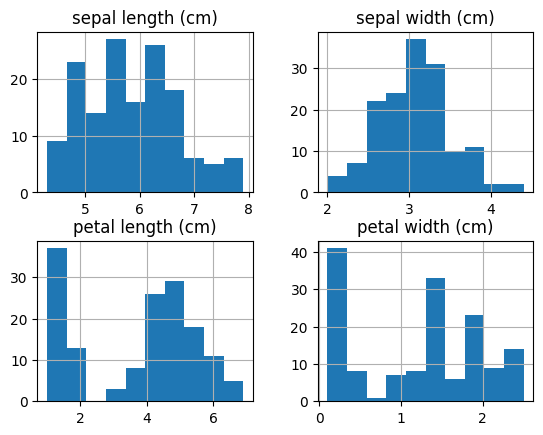

In [715]:
iris.hist(bins=10)

____
Normalizes Iris

In [716]:
normalise = Normalizer().fit(iris)
normalised_iris = normalise.transform(iris)
normalised_iris

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [717]:
print(mall_customers.head())
print(mall_customers.shape)
print(mall_customers.describe())
print(mall_customers.value_counts())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
(200, 5)
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.0000

____
Processing mall_customers

In [718]:
mall_customers.head()
mall_customers = mall_customers.drop(columns='CustomerID')

In [719]:
mall_customers = mall_customers.replace('Male',0)
mall_customers = mall_customers.replace('Female',1)

normalise = Normalizer().fit(mall_customers[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']])
normalised_mall = normalise.transform(mall_customers[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']])
normalised_mall = pd.DataFrame(normalised_mall)

print(normalised_mall)


            0         1         2         3
0    0.000000  0.413925  0.326783  0.849635
1    0.000000  0.247025  0.176446  0.952809
2    0.037987  0.759737  0.607790  0.227921
3    0.012203  0.280676  0.195253  0.939653
4    0.018728  0.580581  0.318383  0.749137
..        ...       ...       ...       ...
195  0.006762  0.236686  0.811496  0.534235
196  0.007315  0.329196  0.921748  0.204833
197  0.000000  0.213924  0.842324  0.494698
198  0.000000  0.225615  0.965915  0.126909
199  0.000000  0.184087  0.840665  0.509308

[200 rows x 4 columns]


Binary representation for Male and Female. After normalizing the data, the silhouette score increased from 0.45 to 0.55

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

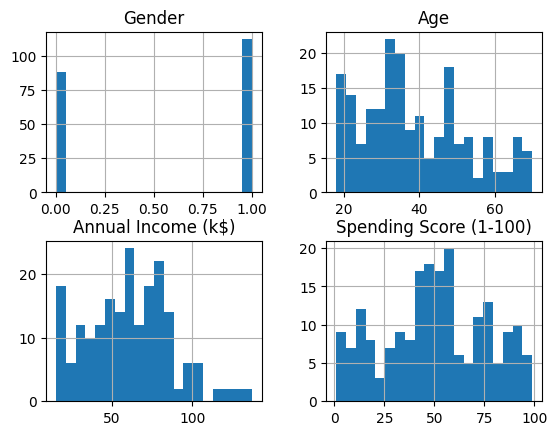

In [720]:
mall_customers.hist(bins=20)

In [721]:
print(mall_customers.describe())
print(mall_customers.shape)
print(mall_customers.value_counts())

           Gender         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean     0.560000   38.850000           60.560000               50.200000
std      0.497633   13.969007           26.264721               25.823522
min      0.000000   18.000000           15.000000                1.000000
25%      0.000000   28.750000           41.500000               34.750000
50%      1.000000   36.000000           61.500000               50.000000
75%      1.000000   49.000000           78.000000               73.000000
max      1.000000   70.000000          137.000000               99.000000
(200, 4)
Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       18   33                  92                        1
1       34   78                  22                        1
        31   72                  71                        1
             81                  93                        1
        32   48          

____
Datasets
Since using X for both, Mall Customers is out commented.

In [722]:
# Iris
X = normalised_iris


# Mall Customers
# X = normalised_mall



----
#### KMeans class ####

In [723]:
class MyKMeans:

    # metrics = "default: euclidean, manhattan, cosine"
    def __init__(self, k=3,max_iter=100,random_state=None, metrics="euclidean"):
        self.k = k
        self.max_iter = max_iter
        self.centroids = []
        self.clusters = []
        self.n_features = 0
        self.inertia = float(0)
        self.random_state = random_state
        self.metrics = metrics
        self.iteration_stop_point = 0
  




    # Fit function starts here
    def fit(self,X):


        # Both panda dataframes och np.arrays can be used
        if isinstance(X, pd.DataFrame):

            # Records the number of features for PCA
            self.n_features = len(X.keys())
            X = X.values
            
        else:

            # Records the number of features for PCA
            self.n_features = len(X[0])
        
    
        # Initierar k centroider slumpmässigt utifrån ev. random_state
        # If random state is set, initializes k centroids randomly according to the parameter
        np.random.seed(self.random_state)
        centroids_indices = np.random.choice(range(len(X)), size=self.k, replace=False)
        self.centroids = X[centroids_indices]
        


        # Start iterations
        for i in range(self.max_iter):
            old_centroids = self.centroids.copy()
            
            
            
            # Assigns each data point to the closest centroid using the Euclidean distance formula
            if self.metrics == "euclidean":
                distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=-1)
                self.clusters = np.argmin(distances, axis=1)
            
            # Assigns each data point to the closest centroid using the Manhattan distance formula
            elif self.metrics == "manhattan":
                distances = np.sum(np.abs(X[:, np.newaxis] - self.centroids), axis=-1)
                self.clusters = np.argmin(distances, axis=1)
            
    
            # Assigns each data point to the closest centroid using the Cosine distance formula
            elif self.metrics == "cosine":
                distances = 1 - np.dot(X, self.centroids.T) / (np.linalg.norm(X, axis=1)[:, np.newaxis] * np.linalg.norm(self.centroids, axis=1))
                self.clusters = np.argmin(distances, axis=1)



            
        
            # Updates the centroid position using the average from all its assigned data points
            self.centroids = np.array([X[self.clusters == i].mean(axis=0) for i in range(self.k)])
            
            
            
            # If centroids stops, the algorithm ends
            if np.all(old_centroids == self.centroids):
                self.iteration_stop_point = i
                break
    

    # Centroid getter
    def get_centroids(self):
        return self.centroids
    

    # Cluster getter
    def get_clusters(self):
        return self.clusters
    

    # Silhouette Score getter
    def get_silhouette(self,X):
        X = np.array(X)
        return silhouette_score(X,self.get_clusters())
    

    # Iteration stop getter
    def get_iteration_stop(self):
        return self.iteration_stop_point


    # Inertia getter
    def get_inertia(self, X):
        X = np.array(X)
        distances = pairwise_distances_argmin_min(X, self.centroids)[1]
        self.inertia = np.sum(distances ** 2)
        return self.inertia
    


    
    # Draws the clusters with its cluster centers
    def show(self,data):
        
    
        # Checking if incoming data has more than 2 features, if so PCA is applied before drawing
        if self.n_features > 2:   
            pca = PCA(n_components=2)
            data = pca.fit_transform(data)
            self.centroids = pca.transform(self.centroids)


        
        while True:
            
            # Checking if data is Panda Dataframe, if not, converts it to a DataFrame and the draws it 
    
            if isinstance(data, pd.DataFrame):
                plt.scatter(data.iloc[:,0],data.iloc[:,1],c=self.clusters, cmap='prism')
                plt.scatter(self.centroids[:,0],self.centroids[:,1])
                plt.xlabel("Column 1")
                plt.ylabel("Column 2")
                
                return
            
            else:
                data = pd.DataFrame(data)


Optimizes k with k between 2 up to 8 and returns silhouette score and an elbow method plot

In [724]:
def optimise_kmeans(data,max_iter=100,random_state=None,metrics='euclidean'):
    means = []
    inertias = []
    scores = []
    k_grid = [2,3,4,5,6,7,8]
    iterations = []


    
    for e,k in enumerate(k_grid,k_grid[0]):
        opt = MyKMeans(k=k, random_state=random_state, metrics=metrics)
        opt.fit(X)
        scores.append(f"Clusters: {e} - Silhouette Score: {opt.get_silhouette(X)}")
        means.append(k)
        inertias.append(opt.get_inertia(X))
        iterations.append(opt.get_iteration_stop())
    
    fig=plt.subplots(figsize=(10,5))
    plt.plot(means,inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()
    
    return scores,iterations 

Creates an instance of the Optimise_kmeans

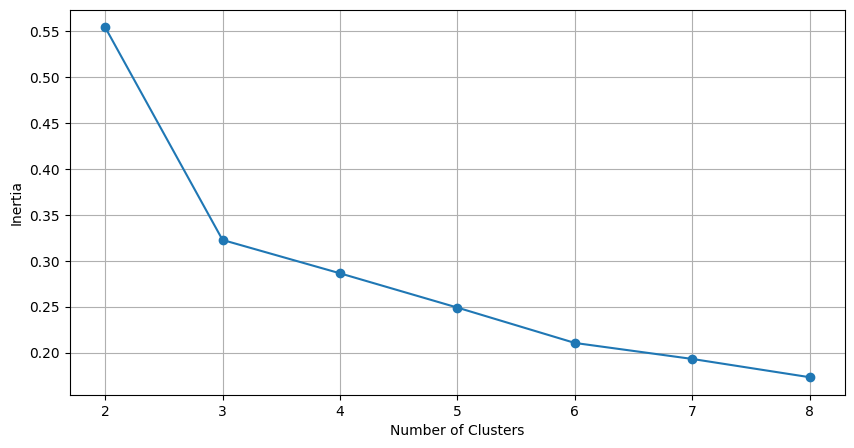

Clusters: 2 - Silhouette Score: 0.8192435078958319
Clusters: 3 - Silhouette Score: 0.5763264768222824
Clusters: 4 - Silhouette Score: 0.49226741918278455
Clusters: 5 - Silhouette Score: 0.4697227228530456
Clusters: 6 - Silhouette Score: 0.28784139068523645
Clusters: 7 - Silhouette Score: 0.2688544786174872
Clusters: 8 - Silhouette Score: 0.2851955875410801
Iterations Stop: 1
Iterations Stop: 5
Iterations Stop: 4
Iterations Stop: 12
Iterations Stop: 12
Iterations Stop: 9
Iterations Stop: 9


In [725]:

# metrics = default: euclidean, manhattan, cosine
scores,iterations = optimise_kmeans(X,max_iter=100,random_state=42,metrics='euclidean')

for score in scores:
    print(f"{score}")
    
for iteration in iterations:
    print(f"Iterations Stop: {iteration}")
    



_____
Creates an instance of MyKMeans


Silhouette Score: 0.8192435078958319


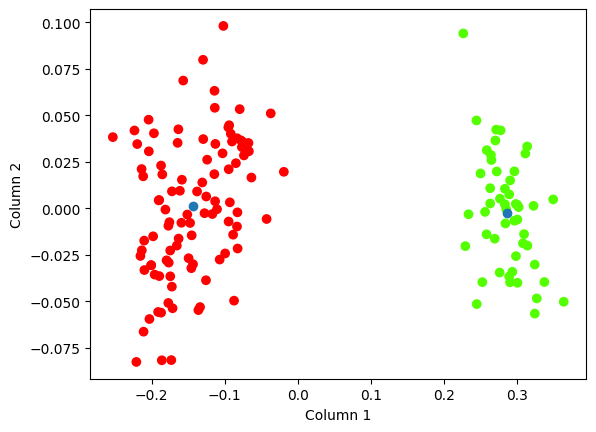

In [726]:

k = MyKMeans(k=2,max_iter=100,random_state=42, metrics='euclidean')
k.fit(X)

k.show(X)
print(f"Silhouette Score: {k.get_silhouette(X)}")

In [727]:
max_iter = 100
kmeans = KMeans(n_clusters=2, max_iter=max_iter)
kmeans.fit(X)

labels = kmeans.predict(X)

cluster_count = np.bincount(labels)
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print(f"Antal kluster: {kmeans.n_clusters}, Antal datapunkter tillhörande kluster:{cluster_count}")
print(f"Silhouette Score: {score}")

Antal kluster: 2, Antal datapunkter tillhörande kluster:[100  50]
Silhouette Score: 0.8192435078958319


/Users/Adam/Documents/jupyter/VS_code/inlämning_3/env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
